Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

### Modules Required

In [53]:


import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

import os
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



### Importing Data

In [5]:
directory = pathlib.Path(r"./data/flowers")

### seperating features and labels

#### Rescaling and filtering

In [6]:
flowers = []
features = []
labels = []
# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)

daisy
dandelion
rose
sunflower
tulip


In [7]:
print(len(features))
print(len(labels))

4323
4323


### Labbel encoding

In [8]:
le=LabelEncoder()
Y=le.fit_transform(labels)
Y=to_categorical(Y,5)

### converting images into tensors

In [9]:
X=np.array(features)

In [10]:
print(X.shape)
print(Y.shape)

(4323, 150, 150)
(4323, 5)


### viewing some samples

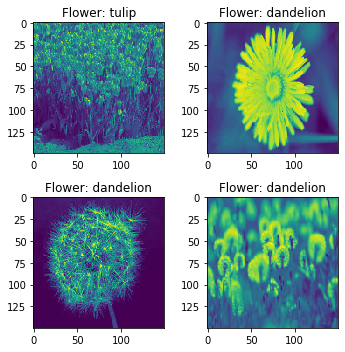

In [11]:
import random as rn
fig,ax=plt.subplots(2,2)
fig.set_size_inches(5,5)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()

### Splitting test and train

In [12]:
train_data,test_data,train_label,test_label = train_test_split( X, Y, test_size = 0.40, random_state = 42)

In [13]:
print(train_data.shape, '\n', test_data.shape)
print()
print(train_label.shape, '\n', test_label.shape)


(2593, 150, 150) 
 (1730, 150, 150)

(2593, 5) 
 (1730, 5)


### Normalizig and changing datatype

In [14]:
train_data = train_data.reshape((2593, 150 * 150))   #changed from 3d to 2d
train_data = train_data.astype('float32') / 255    #Normalization scale in bt 0-1
test_data = test_data.reshape((1730, 150 * 150))  #changed from 3d to 2d
test_data = test_data.astype('float32') / 255    # Normalization scale in bt 0-1

In [15]:
print(train_data.shape, '\n', test_data.shape)
print()
print(train_label.shape, '\n', test_label.shape)

(2593, 22500) 
 (1730, 22500)

(2593, 5) 
 (1730, 5)


### Stricturing and Compiling a Model

In [16]:
from keras import models
from keras import layers
def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    
    return model


In [17]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               11520512  
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 165       
Total params: 11,538,149
Trainable params: 11,538,149
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [18]:
model.fit(train_data, train_label, epochs=100)


Epoch 1/100
2593/2593 [==============================] - 14s 6ms/step - loss: 6.3734 - acc: 0.2017
Epoch 2/100
2593/2593 [==============================] - 15s 6ms/step - loss: 2.2173 - acc: 0.1917
Epoch 3/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.7931 - acc: 0.2291
Epoch 4/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.6596 - acc: 0.2422
Epoch 5/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.7363 - acc: 0.2707: 1s - loss: 1.7449 - ac
Epoch 6/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.6125 - acc: 0.2453
Epoch 7/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.5880 - acc: 0.2773
Epoch 8/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.5682 - acc: 0.2827
Epoch 9/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.5664 - acc: 0.2819
Epoch 10/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.556

2593/2593 [==============================] - 14s 6ms/step - loss: 1.3039 - acc: 0.4501
Epoch 81/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.3123 - acc: 0.4470: 3s - lo
Epoch 82/100
2593/2593 [==============================] - 14s 5ms/step - loss: 1.3274 - acc: 0.4423
Epoch 83/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.2855 - acc: 0.4400
Epoch 84/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.3022 - acc: 0.4447
Epoch 85/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.2580 - acc: 0.4597
Epoch 86/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.2602 - acc: 0.4693
Epoch 87/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.2678 - acc: 0.4624
Epoch 88/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.2580 - acc: 0.4531
Epoch 89/100
2593/2593 [==============================] - 13s 5ms/step - loss: 1.3141 - acc: 0.4655
Epoc

### checking accuracy

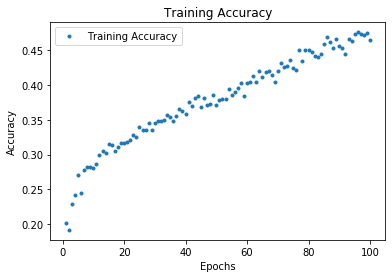

In [19]:
history_dict = model.history.history
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '.', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### checking Loss

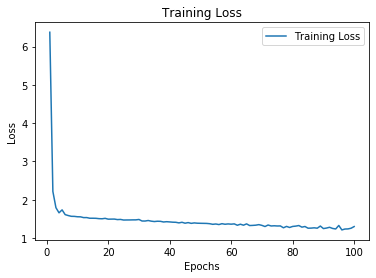

In [20]:
history_dict = model.history.history

loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, '-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
prediction = model.predict(test_data)
prediction

array([[8.2882357e-01, 1.6870655e-01, 2.4697678e-03, 9.7983193e-12,
        1.1409997e-07],
       [6.1982442e-03, 9.9346089e-01, 3.4075021e-04, 3.0718253e-10,
        7.9551427e-08],
       [8.2576132e-01, 1.6801405e-01, 6.2233456e-03, 6.4376088e-10,
        1.2477911e-06],
       ...,
       [5.8039320e-01, 3.3993164e-01, 7.8409836e-02, 1.9212137e-05,
        1.2461783e-03],
       [4.2832515e-01, 4.8543307e-01, 8.4084518e-02, 1.7433922e-05,
        2.1397453e-03],
       [4.1864607e-01, 3.9382488e-01, 1.7219327e-01, 7.2888006e-04,
        1.4606941e-02]], dtype=float32)

In [62]:
model.evaluate(test_data, test_label)

1730/1730 [==============================] - 1s 443us/step


[4.201193849199769, 0.23641619086265564]